In [1]:
pwd

'/content'

In [2]:
cd  drive/My\ Drive/ML-Course/Lesson_4

/content/drive/My Drive/ML-Course/Lesson_4


In [4]:
import pandas as pd

df=pd.read_csv('Data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.set_index('User ID', inplace=True)

In [9]:
df.sample(3)

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15654230,Female,55,130000,1
15794493,Male,40,57000,0
15753861,Female,49,141000,1


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [10]:
X = df.drop('Purchased', axis=1)
y = df.Purchased

In [11]:
X.head()

,Gender,Age,EstimatedSalary
User ID,,,
15624510,Male,19,19000
15810944,Male,35,20000
15668575,Female,26,43000
15603246,Female,27,57000
15804002,Male,19,76000


![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<img src="https://i.ibb.co/16B5Nq1/grid-Search-CV.png" width=500></img>


In [13]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [14]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
  
num_pipeline= make_pipeline(
    StandardScaler()    # تغيير سلم البيانات الرقمية 
)

cat_pipeline= make_pipeline(
    OneHotEncoder(drop="if_binary") #, sparse=False )  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي
)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
)

In [16]:
# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train).shape

(300, 3)

In [17]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train)[10]

array([-0.30964085, -1.29261101,  0.        ])

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [18]:
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier  
pipe_KNN= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    KNeighborsClassifier( )  #    يعوض لاحقا ضمن المعايير أدناه 
)

In [19]:
from sklearn import set_config
set_config(display='diagram')

In [20]:
# تدريب البيانات
pipe_KNN.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3a4f0bfb38>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3a4f0bfac8>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [21]:
# قياس درجة  دقة  التنبؤ
f" Accurcary {pipe_KNN.score(X_test, y_test):.3}"
#  الاصلي  alpha   باعتمدنا  هنا على   معيار   

' Accurcary 0.93'

In [22]:
#pipeline  معايير  
list(pipe_KNN.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'kneighborsclassifier',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__pipeline-2__onehotencoder__categories',
 'columntransformer__pipeline-2__onehotencoder__dr

<img src="https://i.ibb.co/2vW8dtL/hyper-Parameters.png" width=300></img>

In [25]:
import numpy as np
param_grid = {
    'kneighborsclassifier__leaf_size': np.arange(1,51),
    'kneighborsclassifier__n_neighbors': np.arange(1,30),
    'kneighborsclassifier__p' : [1,2]
}

In [26]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [27]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

In [29]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_KNN, param_distributions=param_grid, cv=kf, verbose=3, 
                                n_jobs=-1 ,scoring= scorers   , n_iter=1000 , refit="roc_auc" )

In [30]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 2092 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 3884 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  1.5min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7f3a4f0bfb38>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps...
                                        'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'kneighborsclassifier__p': [1, 2]},
                   refit='roc_auc',
                   scoring={'accuracy_score': make_scorer(accuracy_score),
                            'precision_score': make_scorer(precision_score),
                            'recall_score': make_scorer(recall_score),
                            'roc_auc': make_scorer(roc_auc_score)},
                   verbose=3)

In [31]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_ 

{'kneighborsclassifier__leaf_size': 17,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2}

In [32]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3a4ae76550>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3a4ae76630>)])),
                ('kneighborsclassifier', KNeighborsClassifier(leaf_size=17))])

In [33]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.93'

In [34]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}' 

'Accuracy: 0.93'

![](https://newbiettn.github.io/images/confusion-matrix-noted.jpg)

In [35]:
# نسبة التنبؤ  بالمقارنة مع القيم الأصلية 
f'Accuracy: {recall_score(y_test, y_pred):.3}' 

'Accuracy: 0.906'

In [37]:
#  Precision / recall  بين    F1  يوازن معيار القيس  
from sklearn import metrics
f'Accuracy: {metrics.f1_score(y_test, y_pred):.3}' 

'Accuracy: 0.892'

In [38]:
f"Performance sur le train : {roc_auc_score(y_train, RdSearch.predict(X_train))} "

'Performance sur le train : 0.9126269126269126 '

In [39]:
# overfitting problem
f"Performance sur le train : {roc_auc_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le train : 0.924 '

In [40]:
f"Performance sur le Test : {recall_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.906 '

In [44]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [41]:
! pip install  scikit-plot

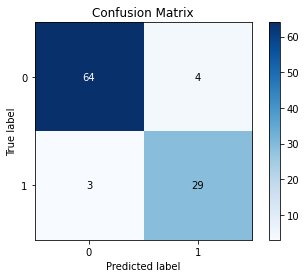

In [42]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred ) #, normalize=True)

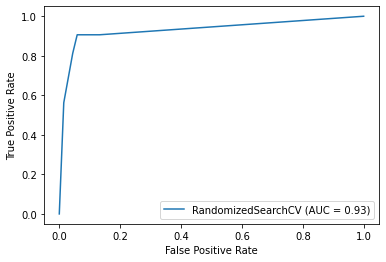

In [45]:
metrics.plot_roc_curve(RdSearch, X_test, y_test)

In [47]:
X.head()

,Gender,Age,EstimatedSalary
User ID,,,
15624510,Male,19,19000
15810944,Male,35,20000
15668575,Female,26,43000
15603246,Female,27,57000
15804002,Male,19,76000


In [48]:
# Visualising the Training set results
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 2].min() - 1, stop = X_set[:, 2].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

TypeError: ignored